In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from train import get_npy_DbyDeep

In [3]:
from tensorflow import keras

# HPP

In [4]:
df_hpp = pd.read_csv('data/HPP.csv')
df_hpp.rename({'Class':'label'}, axis=1, inplace=True)

In [5]:
print('Loading model...')
model = keras.models.load_model("log/DbyDeep")

Loading model...


In [7]:
print('Loading input peptides')
pep_hpp, n_hpp, c_hpp, m1_hpp, m2_hpp, label_hpp = get_npy_DbyDeep(df_hpp)

print('Making predictions')
model_pred = model.predict([pep_hpp, n_hpp, c_hpp, m1_hpp, m2_hpp])

Loading model...
Loading input peptides
Making predictions


In [14]:
df_hpp = pd.concat([df_hpp, pd.DataFrame(model_pred, columns=['probs'])['probs']], axis=1)

pe = df_hpp.loc[df_hpp['label']=='PE1'][['peptide', 'probs']].drop_duplicates()
dmp = df_hpp.loc[df_hpp['label']=='Detected_MPs'][['peptide', 'probs']].drop_duplicates()
mp = df_hpp.loc[df_hpp['label']=='MPs'][['peptide', 'probs']].drop_duplicates()

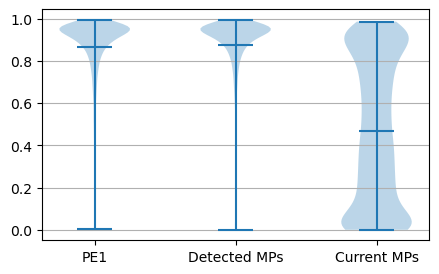

In [15]:
plt.figure(figsize=(5,3))
a = plt.violinplot([pe.probs.astype(float), 
                    dmp.probs.astype(float), 
                    mp.probs.astype(float)],
               showmeans=True,
              )
plt.xticks([y + 1 for y in range(len([pe,dmp,mp]))], ['PE1', 'Detected MPs', 'Current MPs'])
b = plt.grid(axis='y')
plt.show()

# massIVE-KB

In [16]:
df_test = pd.read_csv('data/test_diff_hpp.csv')

In [17]:
print('Loading input peptides')
pep_test, n_test, c_test, m1_test, m2_test, label_test = get_npy_DbyDeep(df_test)

Loading input peptides


In [18]:
probs = model.predict([pep_test, n_test, c_test, m1_test, m2_test])
y_pred = [1 if i>=0.5 else 0 for i in probs]
loss, acc = model.evaluate([pep_test, n_test, c_test, m1_test, m2_test], label_test)
auc = roc_auc_score(label_test, probs)

5352/5352 [==============================] - 90s 15ms/step - loss: 0.3574 - accuracy: 0.8412


Test Loss: 0.35738125443458557
Test Accuracy: 0.8411780595779419
Test AUC : 0.9211546860191141
              precision    recall  f1-score   support

       False     0.8507    0.8326    0.8415     86751
        True     0.8318    0.8500    0.8408     84510

    accuracy                         0.8412    171261
   macro avg     0.8413    0.8413    0.8412    171261
weighted avg     0.8414    0.8412    0.8412    171261



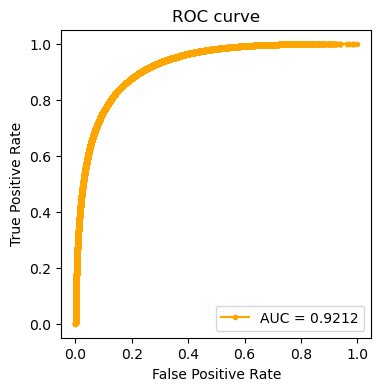

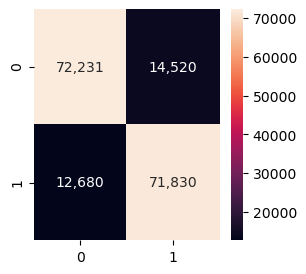

In [19]:
print('Test Loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))
print('Test AUC : {}'.format(auc))
print(classification_report(label_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, _ = roc_curve(label_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(label_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

# Figure

In [ ]:
fpr_dmp = np.load('log/result_DeepMSpeptide_fpr.npy')
tpr_dmp = np.load('log/result_DeepMSpeptide_tpr.npy')

fpr_pf = np.load('log/result_PepFormer_fpr.npy')
tpr_pf = np.load('log/result_PepFormer_tpr.npy')

fpr_c = np.load('log/result_CapsNet_fpr.npy')
tpr_c = np.load('log/result_CapsNet_tpr.npy')

fpr_ap3 = np.load('compareModel/2019ACS_AP3/fpr.npy')
tpr_ap3 = np.load('compareModel/2019ACS_AP3/tpr.npy')

In [ ]:
plt.figure(figsize=(5, 5))

# ours
plt.plot(fpr_ours, tpr_ours, marker=',', 
         label='Ours                     (AUC={:.4f})'.format(rf_auc), 
         color='red')
plt.plot(fpr_ap3, tpr_ap3, marker=',', 
         label='AP3                      (AUC=0.8679)', 
         color='gray')
plt.plot(fpr_dmp, tpr_dmp, marker=',', 
         label='DeepMSpeptide   (AUC=0.8970)', 
         color='green')
plt.plot(fpr_pf, tpr_pf, marker=',', 
         label='PepFormer           (AUC=0.9086)', 
         color='blue')


plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(5, 5))

# ours
plt.plot(fpr_ours, tpr_ours, marker=',', 
         label='Ours                     (AUC={:.4f})'.format(rf_auc), 
         color='red')
plt.plot(fpr_ap3, tpr_ap3, marker=',', 
         label='AP3                      (AUC=0.8679)', 
         color='gray')
plt.plot(fpr_dmp, tpr_dmp, marker=',', 
         label='DeepMSpeptide   (AUC=0.8970)', 
         color='green')
plt.plot(fpr_pf, tpr_pf, marker=',', 
         label='PepFormer           (AUC=0.9086)', 
         color='blue')


plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.xlim(0, 0.1)
# plt.ylim(0.4, 1)
plt.grid()
plt.show()

# Figure - TSNE

In [6]:
from sklearn.manifold import TSNE

In [7]:
df_cs = pd.read_csv('data/df_positive.csv')
pep_test, n_test, c_test, m1_test, m2_test, label_test = get_npy_DbyDeep(df_cs)

In [8]:
p = {ts for row in df_cs[['nterm', 'cterm']].values for ts in row}
n = {ts for row in df_cs[['miss1', 'miss2']].values for ts in row}
multi = p.intersection(n)
p = p.difference(multi)
n = n.difference(multi)
print(len(p), len(n), len(multi))

df_cs_p = pd.DataFrame([[ts, 'True'] for ts in p], columns=['cleavage_site', 'label'])
df_cs_n = pd.DataFrame([[ts, 'False'] for ts in n], columns=['cleavage_site', 'label'])
df_cs_m = pd.DataFrame([[ts, 'Multi'] for ts in multi], columns=['cleavage_site', 'label'])
df_cs = pd.concat([df_cs_p, df_cs_n, df_cs_m], axis=0).reset_index(drop=True)

308255 37148 165499


In [9]:
print(model.summary())

pep_output = 'bidirectional'
n_output = 'bidirectional_1'
c_output = 'bidirectional_2'
m1_output = 'bidirectional_3'
m2_output = 'bidirectional_4'
model_tsne = keras.Model(inputs=model.input,
                                       outputs=[model.get_layer(pep_output).output,
                                                model.get_layer(n_output).output,
                                                model.get_layer(c_output).output,
                                                model.get_layer(m1_output).output,
                                                model.get_layer(m2_output).output])
print(model_tsne.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 81)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 81, 32)       672         input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 15)]         0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 15)]         0                                            
______________________________________________________________________________________________

In [ ]:
pep_out, n_out, c_out, m1_out, m2_out = model_tsne.predict(
    [pep_test, n_test, c_test, m1_test, m2_test])

In [ ]:
vectors_n = TSNE(n_components=2).fit_transform(n_out)
vectors_c = TSNE(n_components=2).fit_transform(c_out)
vectors_m1 = TSNE(n_components=2).fit_transform(m1_out)
vectors_m2 = TSNE(n_components=2).fit_transform(m2_out)

In [ ]:
plt.figure(figsize=(20,20))

plt.scatter(vectors_n[:, 0], vectors_n[:, 1], color='blue', alpha=0.5, label='Cleavaged')
plt.scatter(vectors_c[:, 0], vectors_c[:, 1], color='blue', alpha=0.5, label='MissedCleavaged')
plt.scatter(vectors_m1[:, 0], vectors_m1[:, 1], color='red', alpha=0.5, label='Cleavaged')
plt.scatter(vectors_m2[:, 0], vectors_m2[:, 1], color='red', alpha=0.5, label='MissedCleavaged')

# plt.scatter(multiclv[:, 0], multiclv[:, 1], color='green', alpha=0.1, label='Multi-Label-Cleavaged')
# plt.scatter(multiclv[:, 0], multiclv[:, 1], color='gold', alpha=0.05, label='Multi-Label-MissedCleavaged')

plt.title('DeepDigest TSNE')
plt.savefig('log/result_TSNE_DbyDeep.png', )
plt.show()

In [ ]:
# down sampling
cnt = min(len(clv), len(mclv), len(multiclv))

clv_sample = clv[:cnt]
mclv_sample = mclv[:cnt]
multiclv_sample = multiclv[:cnt]